In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dataoriginal = pd.read_csv('gapminder.csv')

In [3]:
datacopy = dataoriginal[["country", "urbanrate", "incomeperperson", "internetuserate", "alcconsumption", "femaleemployrate", "lifeexpectancy", "employrate"]]
data = datacopy.copy()

In [4]:
data= data.replace(0, np.NaN)
data = data.dropna()

In [19]:
data

,country,urbanrate,incomeperperson,internetuserate,alcconsumption,femaleemployrate,lifeexpectancy,employrate,urbanratepercent,incomelabel
0,Afghanistan,24.04,NaN,3.654122,0.03,25.600000,48.673,55.700001,0-25%,NaN
1,Albania,46.72,1914.996551,44.989947,7.29,42.099998,76.918,51.400002,26-50%,low
2,Algeria,65.22,2231.993335,12.500073,0.69,31.700001,73.131,50.500000,51-74%,low
3,Andorra,88.92,21943.339898,81.000000,10.17,NaN,NaN,NaN,75-100%,low
4,Angola,56.70,1381.004268,9.999954,5.57,69.400002,51.093,75.699997,51-74%,low
...,...,...,...,...,...,...,...,...,...,...
208,Vietnam,27.84,722.807559,27.851822,3.91,67.599998,75.181,71.000000,0-25%,low
209,West Bank and Gaza,71.90,NaN,36.422772,NaN,11.300000,72.832,32.000000,51-74%,NaN
210,"Yemen, Rep.",30.64,610.357367,12.349750,0.20,20.299999,65.493,39.000000,0-25%,low
211,Zambia,35.42,432.226337,10.124986,3.56,53.500000,49.025,61.000000,26-50%,low


In [5]:
data.isnull().sum()

country             0
urbanrate           0
incomeperperson     0
internetuserate     0
alcconsumption      0
femaleemployrate    0
lifeexpectancy      0
employrate          0
dtype: int64

In [6]:
data.dtypes

country             object
urbanrate           object
incomeperperson     object
internetuserate     object
alcconsumption      object
femaleemployrate    object
lifeexpectancy      object
employrate          object
dtype: object

In [7]:
data["internetuserate"] = pd.to_numeric(data["internetuserate"], errors='coerce')
data['alcconsumption'] = pd.to_numeric(data['alcconsumption'], errors='coerce')
data['incomeperperson'] = pd.to_numeric(data['incomeperperson'], errors='coerce')
data['urbanrate'] = pd.to_numeric(data['urbanrate'], errors='coerce')
data['femaleemployrate'] = pd.to_numeric(data['femaleemployrate'], errors='coerce')
data['lifeexpectancy'] = pd.to_numeric(data['lifeexpectancy'], errors='coerce')
data['employrate'] = pd.to_numeric(data['employrate'], errors='coerce')


In [8]:
data.dtypes


country              object
urbanrate           float64
incomeperperson     float64
internetuserate     float64
alcconsumption      float64
femaleemployrate    float64
lifeexpectancy      float64
employrate          float64
dtype: object

In [14]:
#urbanrate rate
print("first values for urban rate:")
urbanrate_freq = pd.concat(dict(counts = data["urbanrate"].value_counts(sort=False, dropna=False), percentages = data["urbanrate"].value_counts(sort=False, dropna=False, normalize=True)), axis=1)
print(urbanrate_freq.head(5))

#income per person
print("first values for capita GDP:")
gdp_freq = pd.concat(dict(counts = data["incomeperperson"].value_counts(sort=False, dropna=False), percentages = data["incomeperperson"].value_counts(sort=False, dropna=False, normalize=True)), axis=1)
print(gdp_freq.head(5))

first values for urban rate:
       counts  percentages
92.0        1     0.004695
100.0       6     0.028169
74.5        1     0.004695
NaN        10     0.046948
73.5        1     0.004695
first values for capita GDP:
              counts  percentages
NaN               23     0.107981
8614.120219        1     0.004695
39972.352768       1     0.004695
279.180453         1     0.004695
161.317137         1     0.004695


In [15]:
print("first values for capita GDP:")
gdp_freq = pd.concat(dict(counts = data["incomeperperson"].value_counts(sort=False, dropna=False), percentages = data["incomeperperson"].value_counts(sort=False, dropna=False, normalize=True)), axis=1)
print(gdp_freq.head(5))


first values for capita GDP:
              counts  percentages
NaN               23     0.107981
8614.120219        1     0.004695
39972.352768       1     0.004695
279.180453         1     0.004695
161.317137         1     0.004695


In [16]:
#calculate frequency in bins
data['urbanratepercent'] =pd.cut(data.urbanrate,4,labels=['0-25%','26-50%','51-74%','75-100%'])
urban_freq = pd.concat(dict(counts = data["urbanratepercent"].value_counts(sort=False, dropna=False),
                                   percentages = data["urbanratepercent"].value_counts(sort=False, dropna=False,
                                                                                       normalize=True)),
                            axis=1)
print("Frequency distribution - urban rate:\n", urban_freq)


Frequency distribution - urban rate:
          counts  percentages
0-25%        42     0.197183
26-50%       51     0.239437
51-74%       68     0.319249
75-100%      42     0.197183
NaN          10     0.046948


In [17]:
#make new categorical variable to label income per person in 4 categories
#calculate frequency in bins
print('Income per person in categories')
data['incomelabel'] =pd.cut(data.incomeperperson,4,labels=['low','medium','high','very high'])
income_freq = pd.concat(dict(counts = data["incomelabel"].value_counts(sort=False, dropna=False),
                                   percentages = data["incomelabel"].value_counts(sort=False, dropna=False,
                                                                                       normalize=True)),
                            axis=1)
print("Frequency distribution - income per person:\n", income_freq)


#What are the countries with high and very high GDP? Order by income
print('Countries with high and very high GDP')
highincome = data[(data['incomelabel'] == 'high') | (data['incomelabel'] == 'very high') ]
print(highincome.loc[:, ['country', 'incomeperperson', 'incomelabel']].sort_values(by='incomelabel', ascending=False))

Income per person in categories
Frequency distribution - income per person:
            counts  percentages
low           169     0.793427
medium         18     0.084507
high            1     0.004695
very high       2     0.009390
NaN            23     0.107981
Countries with high and very high GDP
           country  incomeperperson incomelabel
109  Liechtenstein     81647.100031   very high
127         Monaco    105147.437697   very high
20         Bermuda     62682.147006        high


In [20]:
print('Countries by country')
country_counts = data.groupby('country').size()
print(country_counts)
print('\n')

print('GDP Statistics by country')
gdp_mean = data.groupby('country')['incomeperperson'].agg([np.mean, np.median, len])
print(gdp_mean)

print('Urban rate by country')
urban_mean = data.groupby('country')['urbanrate'].agg([np.mean, np.median, len])
print(urban_mean)

Countries by country
country
Afghanistan           1
Albania               1
Algeria               1
Andorra               1
Angola                1
                     ..
Vietnam               1
West Bank and Gaza    1
Yemen, Rep.           1
Zambia                1
Zimbabwe              1
Length: 213, dtype: int64


GDP Statistics by country
                            mean        median  len
country                                            
Afghanistan                  NaN           NaN  1.0
Albania              1914.996551   1914.996551  1.0
Algeria              2231.993335   2231.993335  1.0
Andorra             21943.339898  21943.339898  1.0
Angola               1381.004268   1381.004268  1.0
...                          ...           ...  ...
Vietnam               722.807559    722.807559  1.0
West Bank and Gaza           NaN           NaN  1.0
Yemen, Rep.           610.357367    610.357367  1.0
Zambia                432.226337    432.226337  1.0
Zimbabwe              320.771

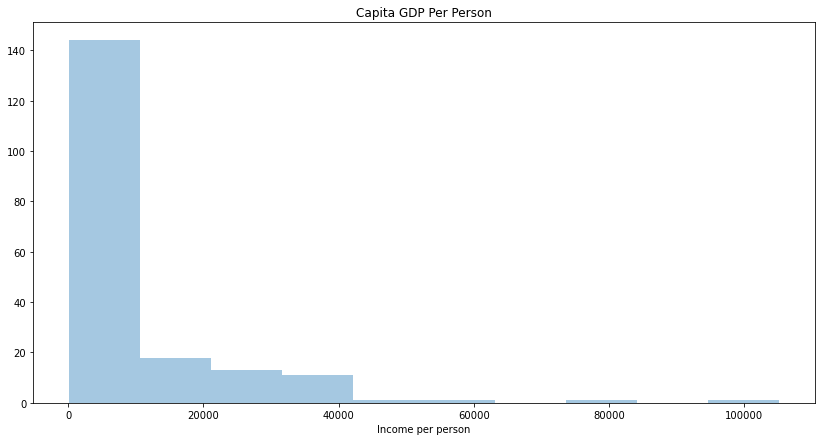

In [21]:
plt.figure(figsize=(14, 7))
sns.distplot(data['incomeperperson'], bins=10, kde=False)
plt.xlabel('Income per person')
plt.title('Capita GDP Per Person')
plt.show()

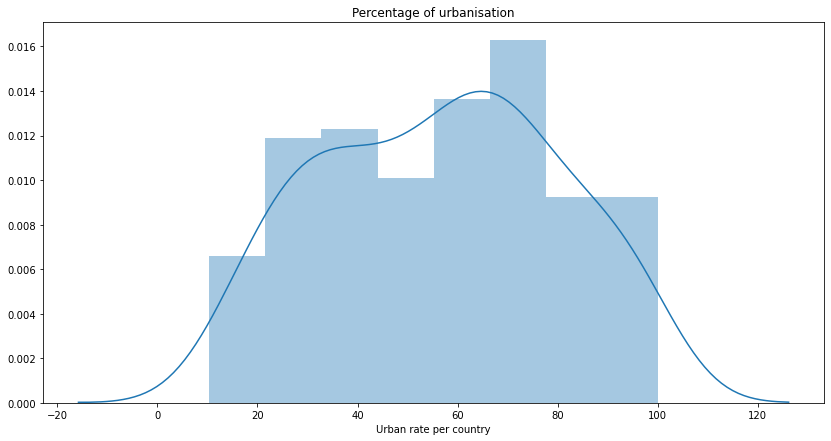

In [22]:
plt.figure(figsize=(14, 7))
sns.distplot(data['urbanrate'])
plt.xlabel('Urban rate per country')
plt.title('Percentage of urbanisation')
plt.show()

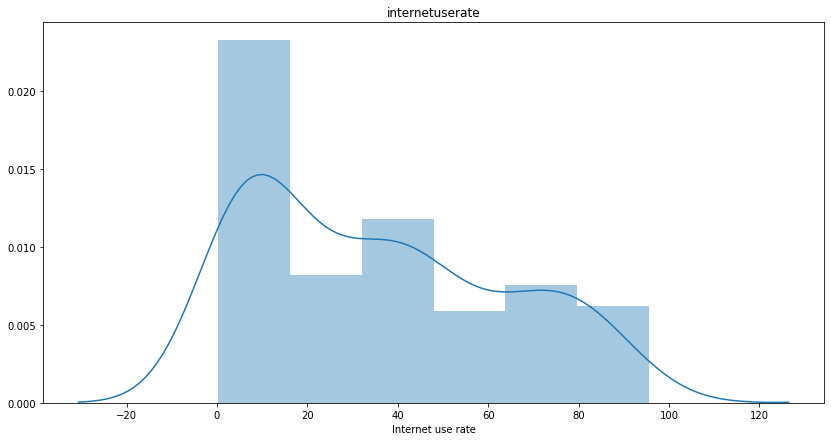

In [23]:
#Histogram urban rate
plt.figure(figsize=(14, 7))
sns.distplot(data['internetuserate'])
plt.xlabel('Internet use rate')
plt.title('internetuserate')
plt.show()

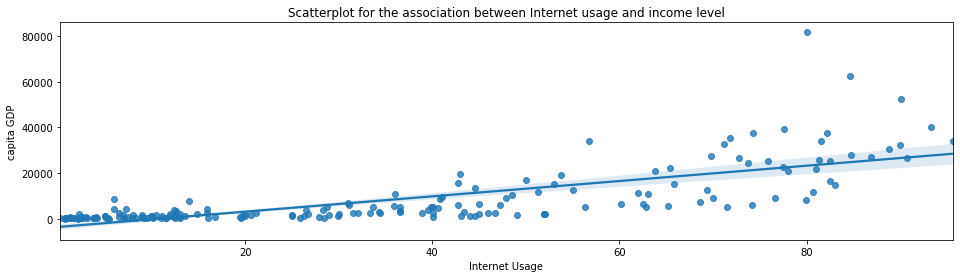

In [24]:
fig = plt.figure(figsize=(16,4))
sns.regplot(x="internetuserate", y="incomeperperson", fit_reg=True, data=data);
plt.xlabel('Internet Usage');
plt.ylabel('capita GDP');
plt.title('Scatterplot for the association between Internet usage and income level');

Text(0.5, 0, 'Income per person')

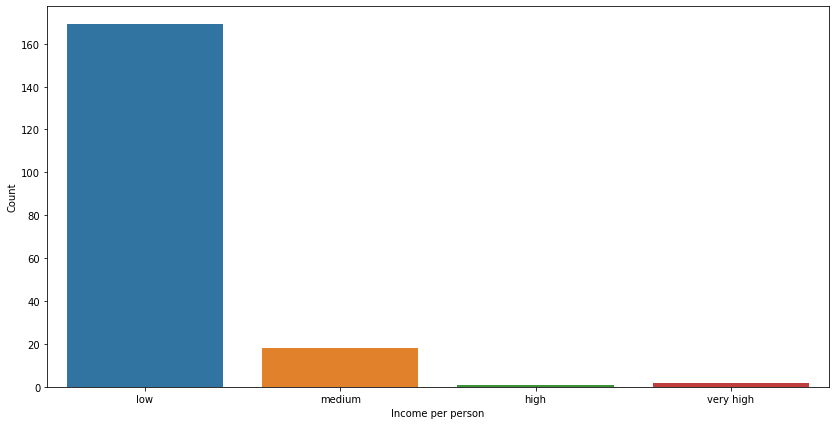

In [25]:
plt.figure(figsize=(14, 7))
sns.countplot(x='incomelabel', data=data)
plt.ylabel('Count')
plt.xlabel('Income per person')

Text(0.5, 0, 'Percentage of urbanisation')

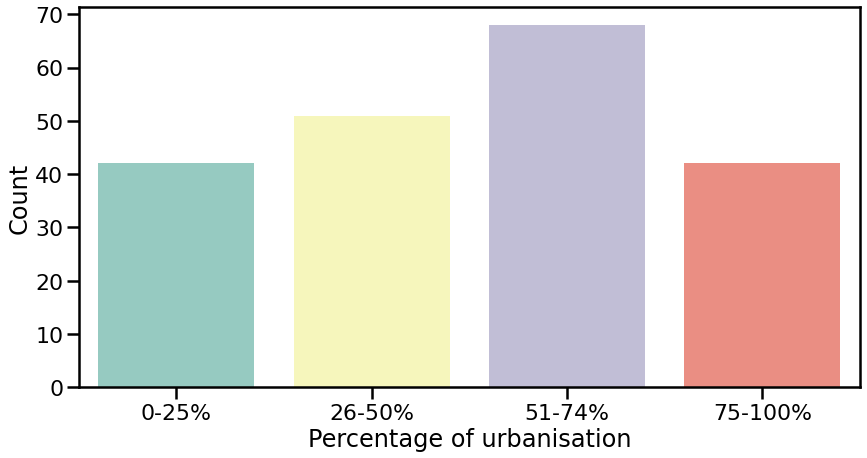

In [26]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='urbanratepercent', data=data, palette="Set3")
plt.ylabel('Count')
plt.xlabel('Percentage of urbanisation')

Text(0.5, 21.920000000000016, 'country')

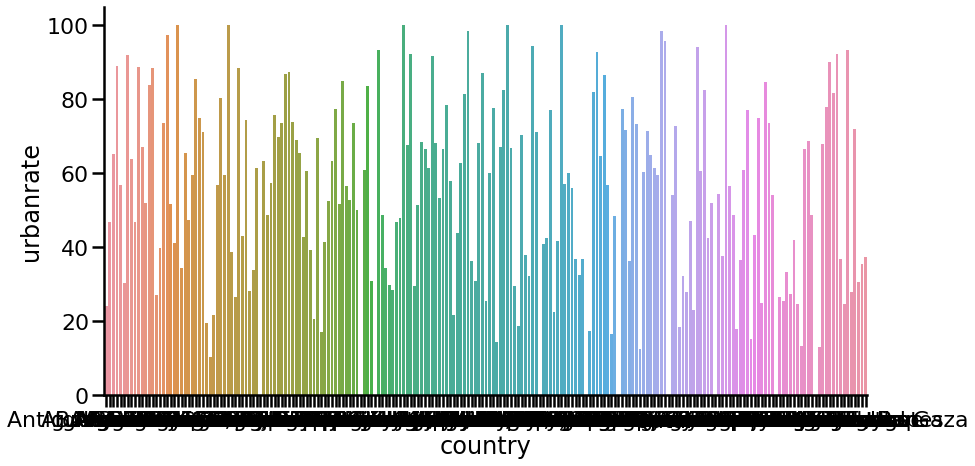

In [28]:
sns.factorplot(x='country', y='urbanrate', data=data, kind='bar', size=7, aspect=2)
plt.ylabel('urbanrate')
plt.xlabel('country')
